In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats import anova
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#importing 14datasets
df_circuits = pd.read_csv("../data/circuits.csv") #list of circuits and their attributes
df_constructors = pd.read_csv("../data/constructors.csv") #list of constructors and their attributes
df_constructor_standings = pd.read_csv("../data/constructor_standings.csv") #points and positions for a constructor given race id
df_constructor_results = pd.read_csv("../data/constructor_results.csv") #
df_seasons = pd.read_csv("../data/seasons.csv")
df_status = pd.read_csv("../data/status.csv")
df_drivers = pd.read_csv("../data/drivers.csv")
df_driver_standings = pd.read_csv("../data/driver_standings.csv")
df_qualifying = pd.read_csv("../data/qualifying.csv")
df_races = pd.read_csv("../data/races.csv")
df_lap_times = pd.read_csv("../data/lap_times.csv")
df_pit_stops = pd.read_csv("../data/pit_stops.csv")
df_results = pd.read_csv("../data/results.csv")
df_sprint_results = pd.read_csv("../data/sprint_results.csv")

In [3]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

In [4]:
df_results["position"].value_counts()

\N    10786
4      1067
3      1067
2      1065
5      1063
1      1060
6      1055
7      1036
8      1008
9       970
10      910
11      833
12      732
13      645
14      537
15      464
16      374
17      282
18      187
19      121
20       64
21       34
22       19
23        8
24        3
26        1
29        1
28        1
27        1
31        1
32        1
33        1
25        1
30        1
Name: position, dtype: int64

In [54]:
df_results["driverId"].value_counts()

8      352
4      336
22     326
18     309
30     308
      ... 
218      1
582      1
598      1
614      1
791      1
Name: driverId, Length: 853, dtype: int64

In [55]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [56]:
df_drivers.loc[df_drivers["surname"]=="Hamilton"]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
708,708,duncan_hamilton,\N,\N,Duncan,Hamilton,1920-04-30,British,http://en.wikipedia.org/wiki/Duncan_Hamilton_(...


In [57]:
df_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   year       1080 non-null   int64 
 2   round      1080 non-null   int64 
 3   circuitId  1080 non-null   int64 
 4   name       1080 non-null   object
 5   date       1080 non-null   object
 6   time       1080 non-null   object
 7   url        1080 non-null   object
dtypes: int64(4), object(4)
memory usage: 67.6+ KB


In [58]:
df_races["year"].value_counts()

2022    23
2021    22
2019    21
2018    21
2016    21
        ..
1956     8
1957     8
1961     8
1955     7
1950     7
Name: year, Length: 73, dtype: int64

In [59]:
races21 = list(df_races.loc[df_races["year"]==2021,"raceId"].values)
df21 = df_results.loc[df_results['raceId'].isin(races21)]

In [60]:
df21["driverId"].nunique()

21

In [61]:
df21["raceId"].nunique()

22

In [62]:
df21["constructorId"].nunique()

10

In [63]:
df21["number"].value_counts()

6     22
47    22
14    22
77    22
11    22
63    22
3     22
33    22
5     22
55    22
99    22
10    22
44    22
22    22
4     22
16    22
31    22
18    22
9     21
7     20
88     2
Name: number, dtype: int64

In [64]:
df21['position'].value_counts()

\N    51
6     22
5     22
1     22
12    22
11    22
3     22
9     22
2     22
8     22
13    22
10    22
7     22
4     22
15    21
14    21
16    18
17    17
18    15
19     7
20     3
Name: position, dtype: int64

In [65]:
df21['position'].replace('\\N', None,inplace=True)

<AxesSubplot:xlabel='number', ylabel='points'>

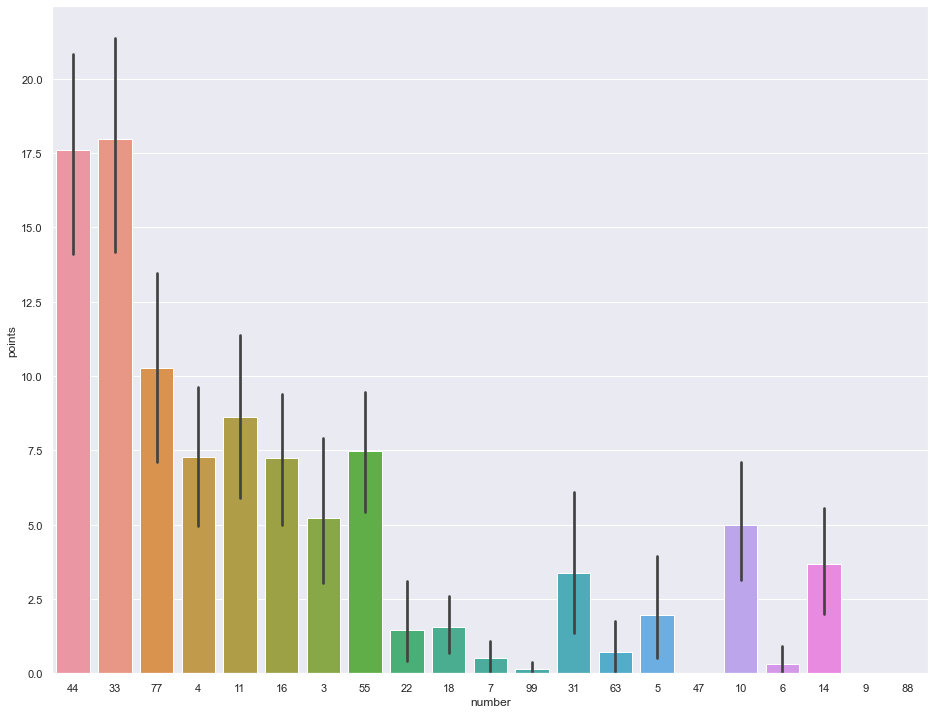

In [66]:
sns.barplot(x='number',y='points',data=df21)

<AxesSubplot:>

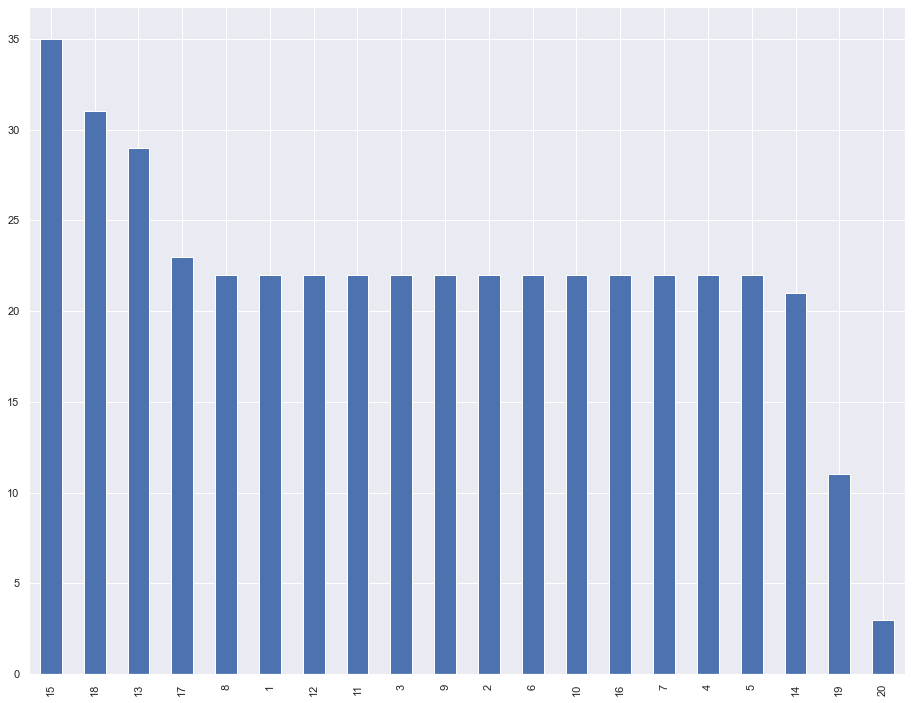

In [68]:
df21['position'].value_counts().plot.bar()


In [69]:
df_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25400,1073,815,9,11,4,15,15,15,0.0,55,\N,\N,51,2,1:26.419,219.993,5
25395,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,1:29.293,212.912,3
25396,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,1:29.442,212.557,6
25397,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,1:30.647,209.732,6


In [70]:
df21.loc[df21['fastestLapTime']== '192.074','fastestLapTime'] = '1:20.244'

/Users/anagha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [71]:
df21['fastestLapTime'].replace('\\N', None,inplace=True)
df21['fastestLapTime'] = pd.to_datetime(df21['fastestLapTime'], format='%M:%S.%f')


<ipython-input-71-2929aec78d62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df21['fastestLapTime'] = pd.to_datetime(df21['fastestLapTime'], format='%M:%S.%f')


In [72]:
#df21.loc[df21['fastestLapSpeed']== '1:20.244'] = '192.074'
df21['fastestLapSpeed'].replace('\\N', None,inplace=True)
df21['fastestLapSpeed'] = df21['fastestLapSpeed'].astype(float)

<ipython-input-72-2a01b44bb65a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df21['fastestLapSpeed'] = df21['fastestLapSpeed'].astype(float)


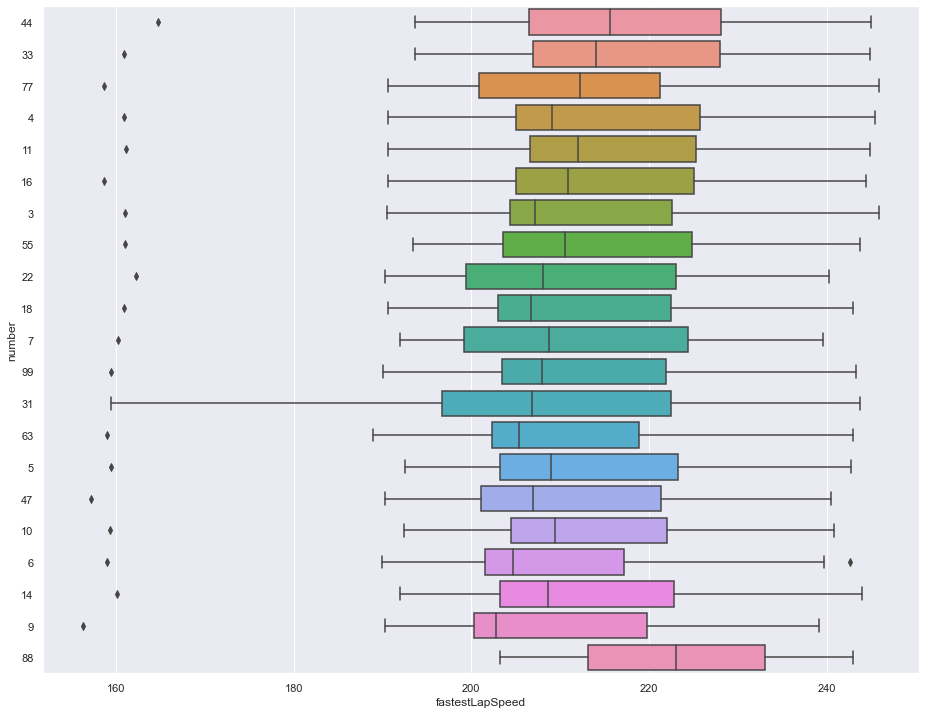

In [75]:
sns.boxplot(y="number",x="fastestLapSpeed",data=df21)
sns.set(rc={'figure.figsize':(13.7,12.27)})

In [82]:
df_races.drop(['url'], axis=1, inplace=True)

In [85]:
df = pd.merge(df_races,df21,on ="raceId")

<AxesSubplot:xlabel='fastestLapSpeed', ylabel='name'>

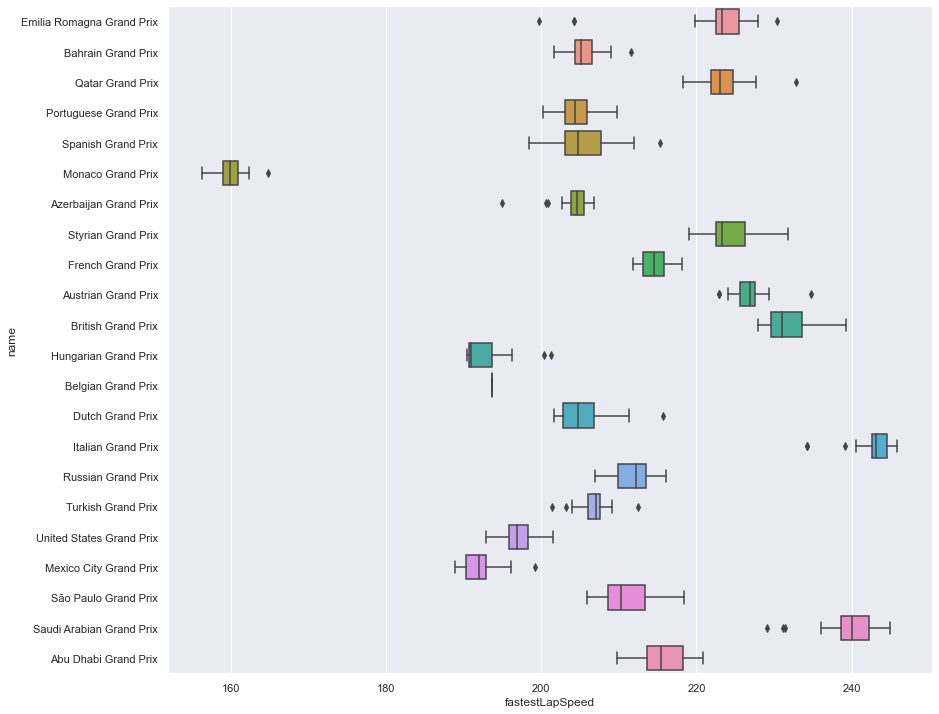

In [88]:
sns.boxplot(y="name",x="fastestLapSpeed",data=df)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

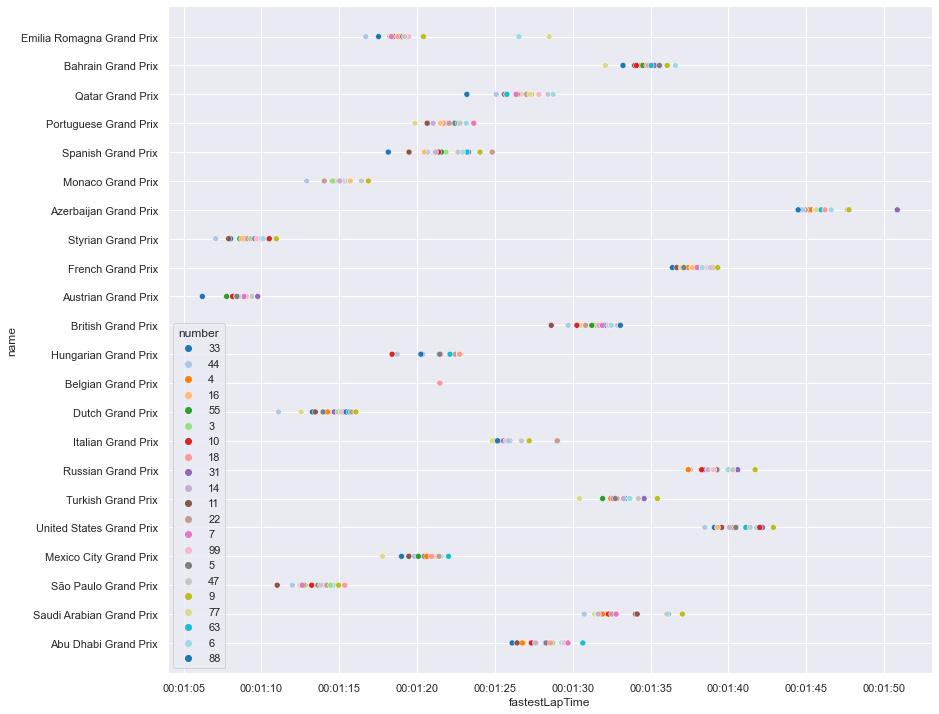

In [103]:
sns.scatterplot(y="name",x="fastestLapTime",hue='number',palette='tab20',data=df)
# sns.color_palette("tab20", 21)